<a href="https://colab.research.google.com/github/tayyabaarooj/fyp/blob/main/SkinCancerClassificationLeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_ds="/content/drive/MyDrive/dataset/skinCancer/train"
test_ds="/content/drive/MyDrive/dataset/skinCancer/test"


# Data preprocessing
****

In [4]:
os.listdir('/content/drive/MyDrive/dataset/skinCancer/train')

['benign', 'malignant']

In [5]:
batch_size=32
img_size=224

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2467 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [ ]:
print(len(train_generator))
print(len(test_ds))


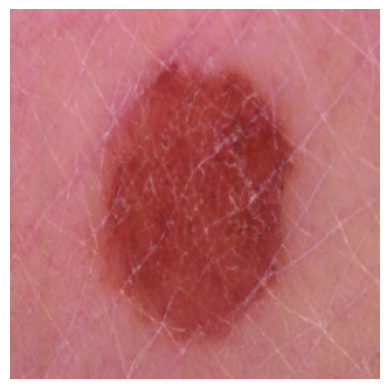

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/dataset/skinCancer/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build MobileNet Model

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Define input shape
input_shape = (img_size, img_size, 1)  # Assuming grayscale images, adjust if using RGB

# Create a Sequential model
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 output classes, adjust according to your task
])

#   Model summary

In [ ]:
# Print the model summary

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=test_generator)


Epoch 1/5
78/78 [==============================] - 543s 7s/step - loss: 0.4997 - accuracy: 0.8046 - val_loss: 0.4309 - val_accuracy: 0.7938
Epoch 2/5
78/78 [==============================] - 530s 7s/step - loss: 0.4494 - accuracy: 0.8200 - val_loss: 0.4523 - val_accuracy: 0.7861
Epoch 3/5
78/78 [==============================] - 508s 6s/step - loss: 0.4370 - accuracy: 0.8180 - val_loss: 0.4446 - val_accuracy: 0.7861
Epoch 4/5
78/78 [==============================] - 523s 7s/step - loss: 0.4317 - accuracy: 0.8237 - val_loss: 0.4029 - val_accuracy: 0.8150
Epoch 5/5
78/78 [==============================] - 503s 6s/step - loss: 0.3976 - accuracy: 0.8370 - val_loss: 0.4086 - val_accuracy: 0.8112


In [ ]:
n_categories = len(os.listdir('/content/drive/MyDrive/dataset/skinCancer/test'))# number of categories print(n_categories)

In [ ]:
n_categories

2

In [ ]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.671729,0.563032,0.636876,0.587669
1,0.521460,0.747061,0.455429,0.813102
2,0.446021,0.783543,0.413326,0.820809
3,0.452209,0.775841,0.410732,0.815029
4,0.427191,0.793677,0.453072,0.795761


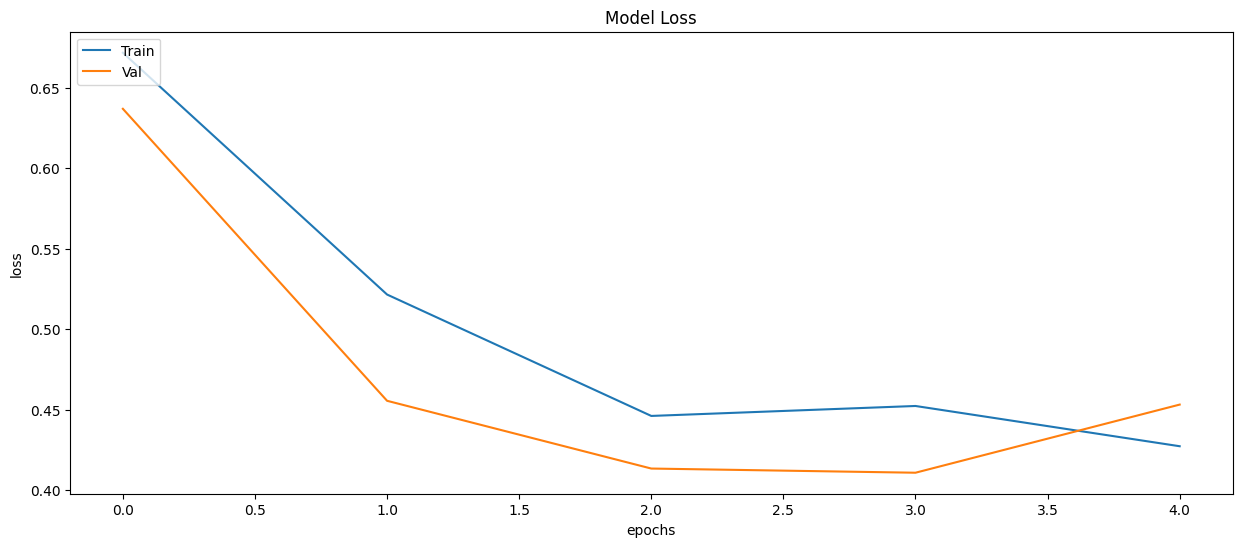

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

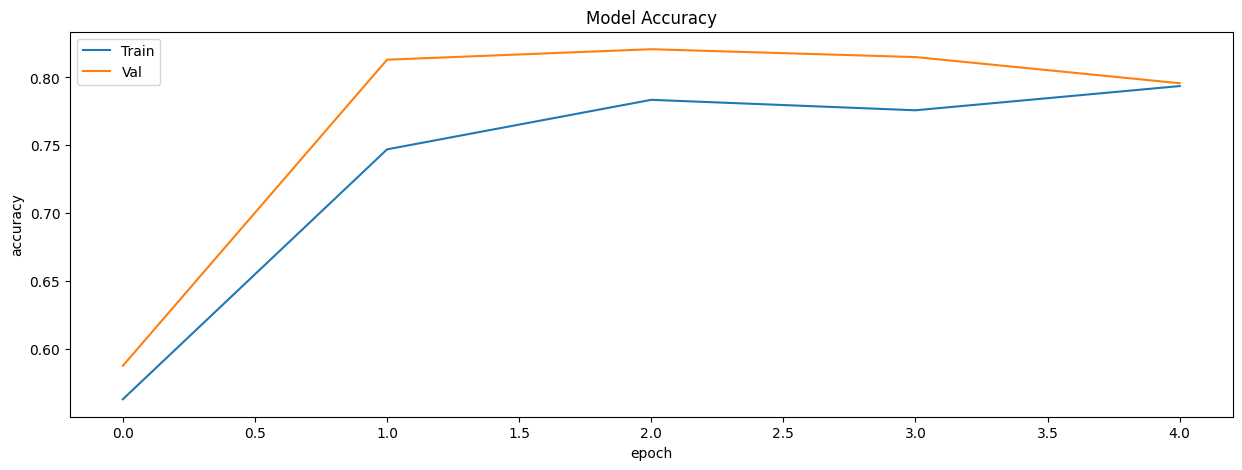

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

13/17 [=====================>........] - ETA: 4s

In [ ]:
results =model.evaluate(test_generator)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

7/7 [==============================] - 1s 155ms/step


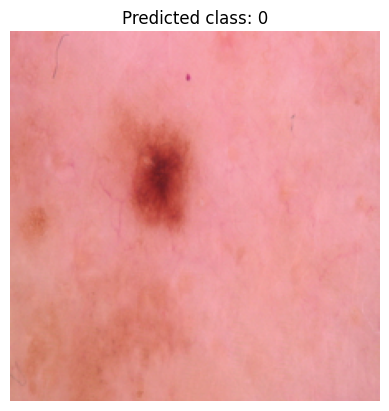

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/dataset/skinCancer/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.9954592
Predicted class for 2.jpg : benign
Class probability: 0.9953675
Predicted class for 3.jpg : benign
Class probability: 0.99132264
Predicted class for 4.jpg : benign
Class probability: 0.9485368
Predicted class for 5.jpg : malignant
Class probability: 0.5874762
Predicted class for 6.jpg : benign
Class probability: 0.99524564
Predicted class for 7.jpg : benign
Class probability: 0.9887932
Predicted class for 8.jpg : benign
Class probability: 0.9953377
Predicted class for 9.jpg : benign
Class probability: 0.9946091
Predicted class for 10.jpg : benign
Class probability: 0.99644643
Predicted class for 11.jpg : malignant
Class probability: 0.5904089
Predicted class for 12.jpg : benign
Class probability: 0.9963741
Predicted class for 13.jpg : malignant
Class probability: 0.6924605
Predicted class for 14.jpg : malignant
Class probability: 0.5900322
Predicted class for 15.jpg : malignant
Class probability: 0.7043755
Predicted class 

# Thank You !